# Welcome

**Today we are going to implement logistic regression model from scratch without using sklearn or tensorflow libraries. All we need to implement it numpy and the math behind logistic regression. It will be easy to understand and you will get better understanding about logistic regression and how it is work.**

# Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train_data=pd.read_csv('../input/titanic/train.csv')
test_data=pd.read_csv('../input/titanic/test.csv')

# Data preprocessing

In [3]:
print(' The shape of train data is',train_data.shape)
print(' The shape of test data is',test_data.shape)

 The shape of train data is (891, 12)
 The shape of test data is (418, 11)


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Missing or duplicated data**

In [6]:
print(' Is there any missing values in train data?',train_data.isnull().sum().any())
print(' Is there any duplicated values in train data?',train_data.duplicated().sum().any())

 Is there any missing values in train data? True
 Is there any duplicated values in train data? False


In [7]:
train_data=train_data.dropna()

In [8]:
print(' Is there any missing values in test data?',test_data.isnull().sum().any())
print(' Is there any duplicated values in test data?',test_data.duplicated().sum().any())

 Is there any missing values in test data? True
 Is there any duplicated values in test data? False


In [9]:
test_data=test_data.dropna()

**Is there str values?**

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     object 
 10  Embarked     87 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ KB


In [12]:
train_data['Name']=train_data['Name'].astype('category')
train_data['Sex']=train_data['Sex'].astype('category')
train_data['Ticket']=train_data['Ticket'].astype('category')
train_data['Cabin']=train_data['Cabin'].astype('category')
train_data['Embarked']=train_data['Embarked'].astype('category')

In [13]:
train_data['Name']=train_data['Name'].cat.codes
train_data['Sex']=train_data['Sex'].cat.codes
train_data['Ticket']=train_data['Ticket'].cat.codes
train_data['Cabin']=train_data['Cabin'].cat.codes
train_data['Embarked']=train_data['Embarked'].cat.codes

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    int16  
 4   Sex          183 non-null    int8   
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    int16  
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    int16  
 11  Embarked     183 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 12.9 KB


In [15]:
test_data['Name']=test_data['Name'].astype('category')
test_data['Sex']=test_data['Sex'].astype('category')
test_data['Ticket']=test_data['Ticket'].astype('category')
test_data['Cabin']=test_data['Cabin'].astype('category')
test_data['Embarked']=test_data['Embarked'].astype('category')

In [16]:
test_data['Name']=test_data['Name'].cat.codes
test_data['Sex']=test_data['Sex'].cat.codes
test_data['Ticket']=test_data['Ticket'].cat.codes
test_data['Cabin']=test_data['Cabin'].cat.codes
test_data['Embarked']=test_data['Embarked'].cat.codes

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     int8   
 3   Sex          87 non-null     int8   
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     int8   
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     int8   
 10  Embarked     87 non-null     int8   
dtypes: float64(2), int64(4), int8(5)
memory usage: 5.2 KB


# Visualization

**Data distribution**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':' Survived Distribution Plot'}, xlabel='Survived', ylabel='Density'>

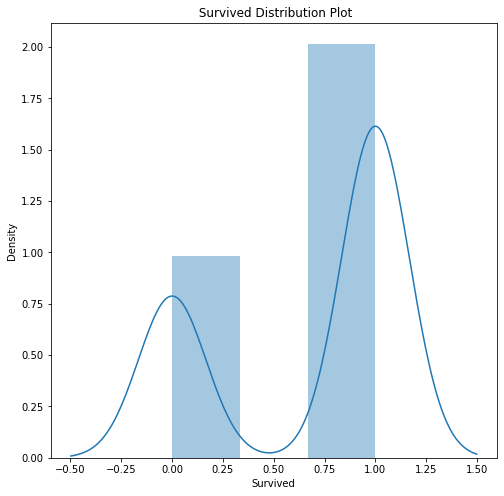

In [18]:
plt.figure(figsize=(8,8))

plt.title(' Survived Distribution Plot')
sns.distplot(train_data['Survived'])

**Pair plot**

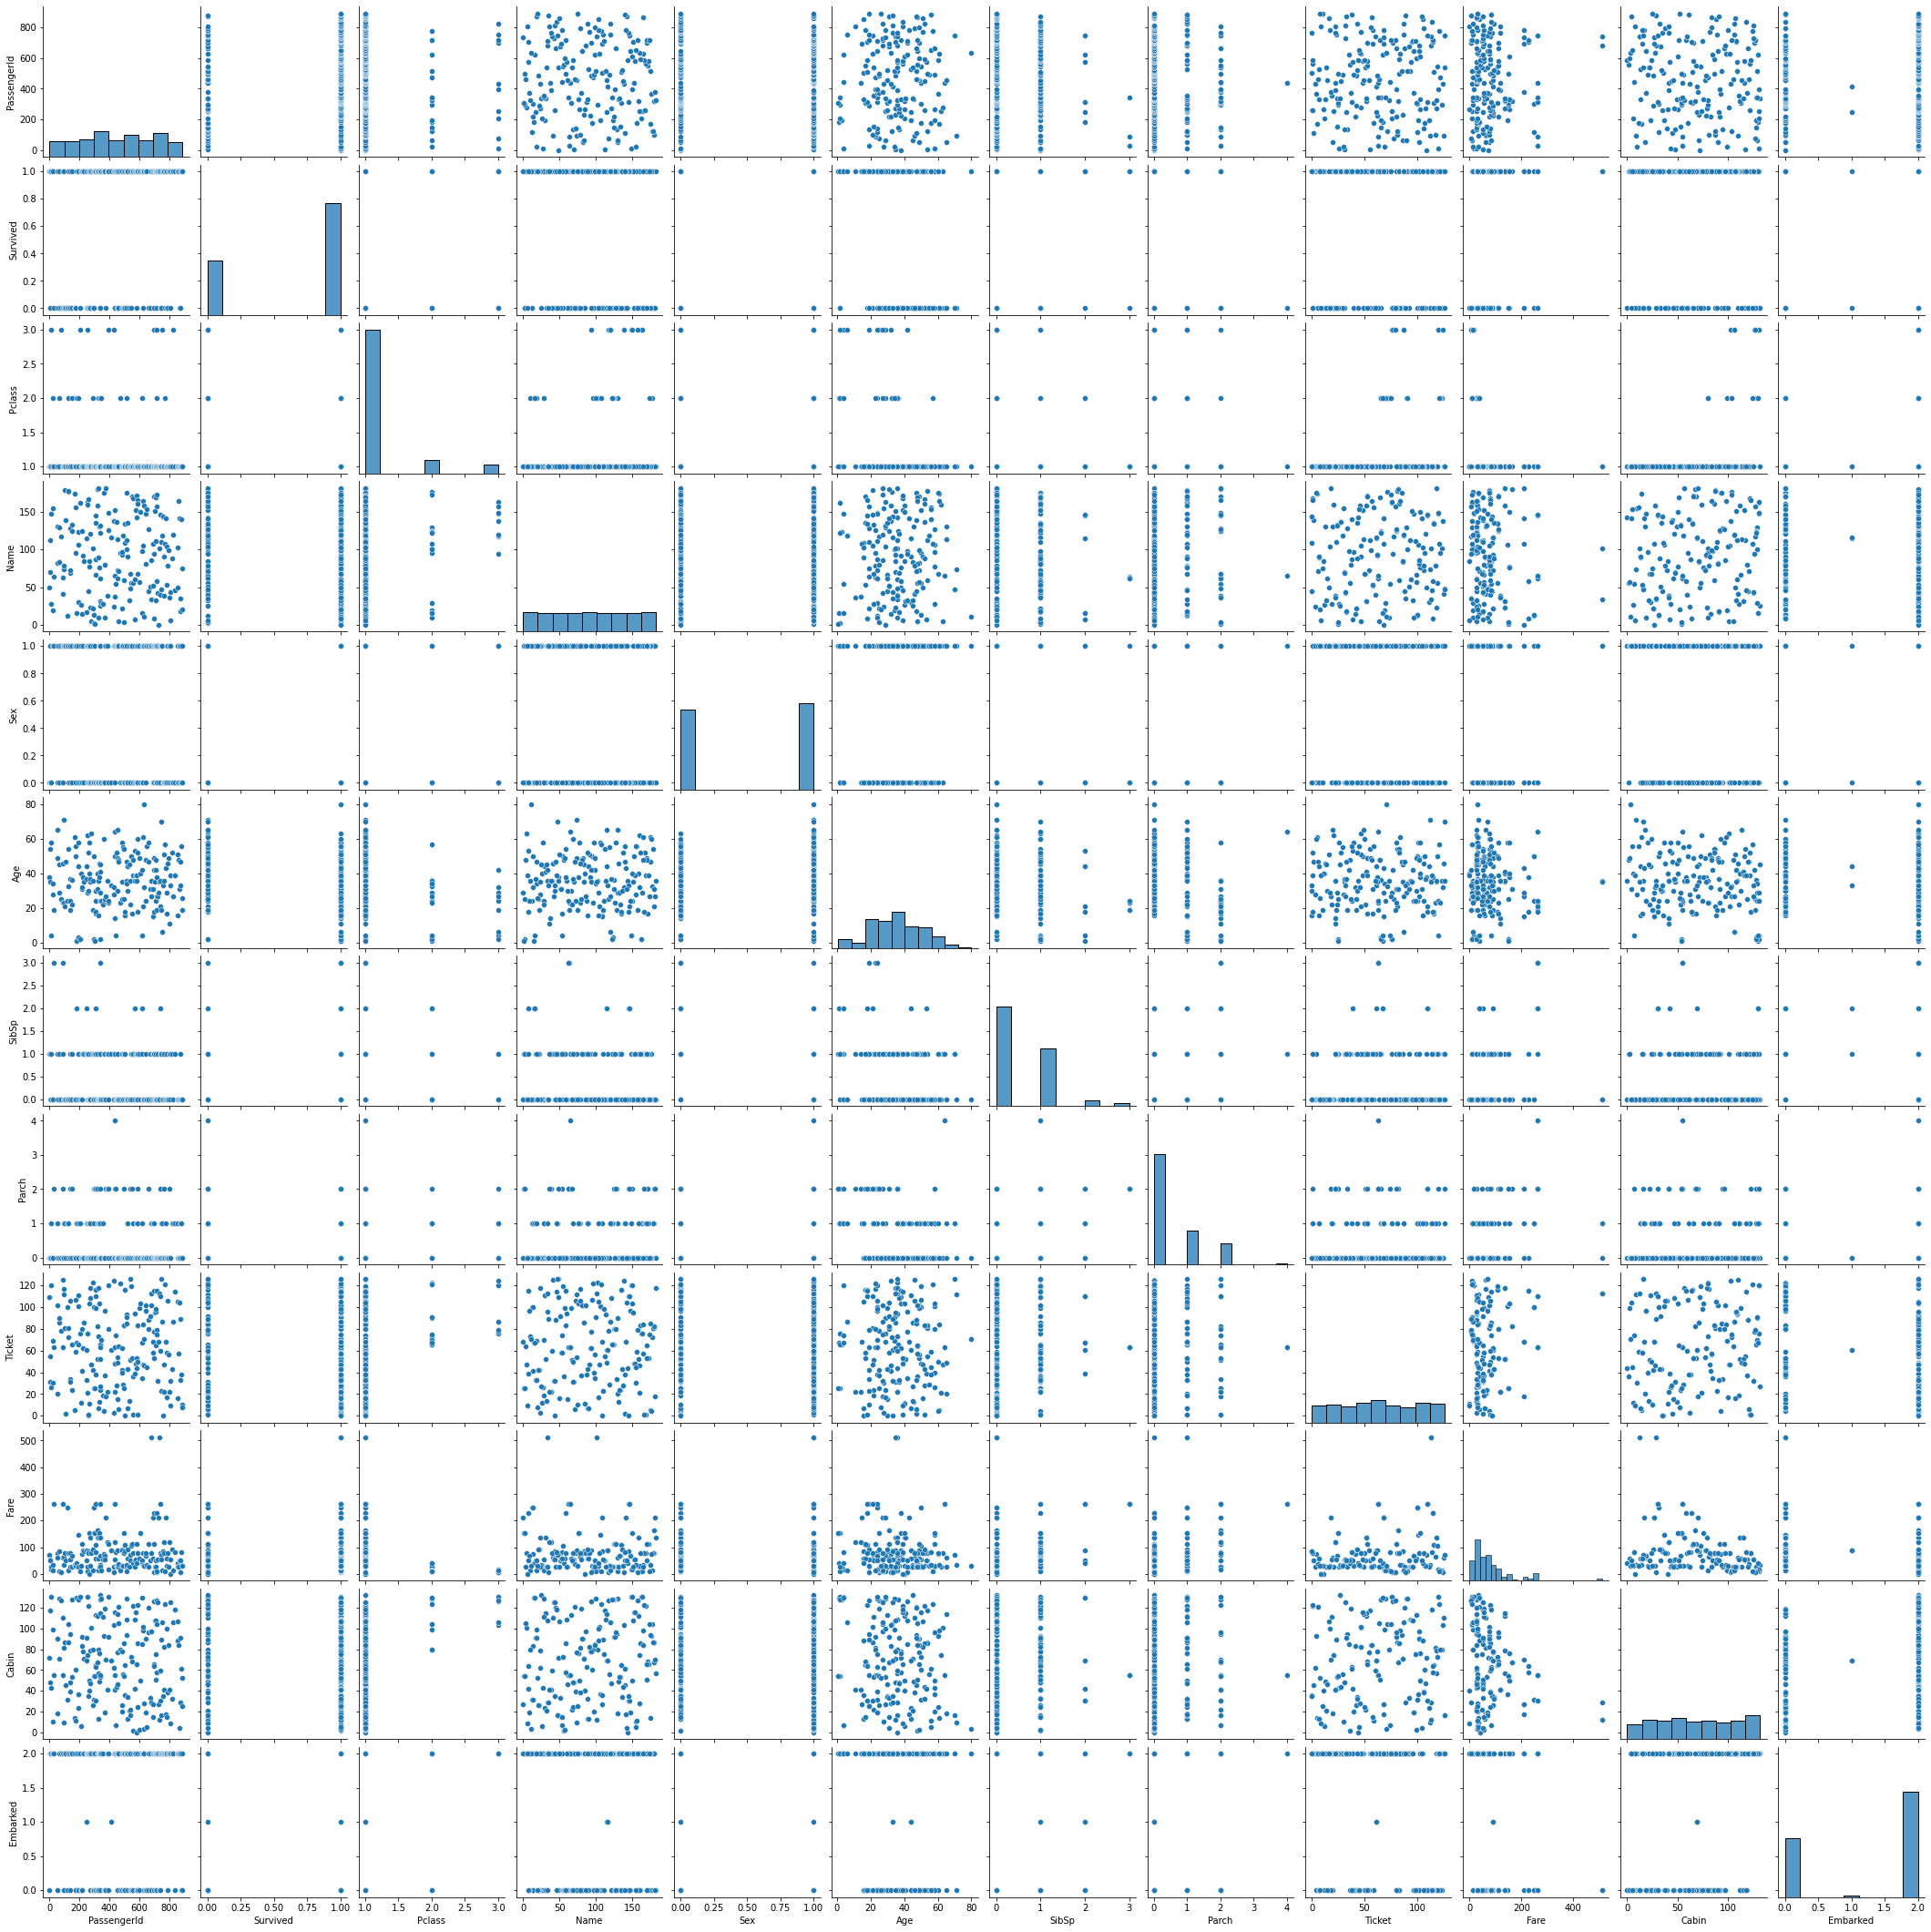

In [19]:
ax = sns.pairplot(train_data[train_data.columns])

**Box plot**

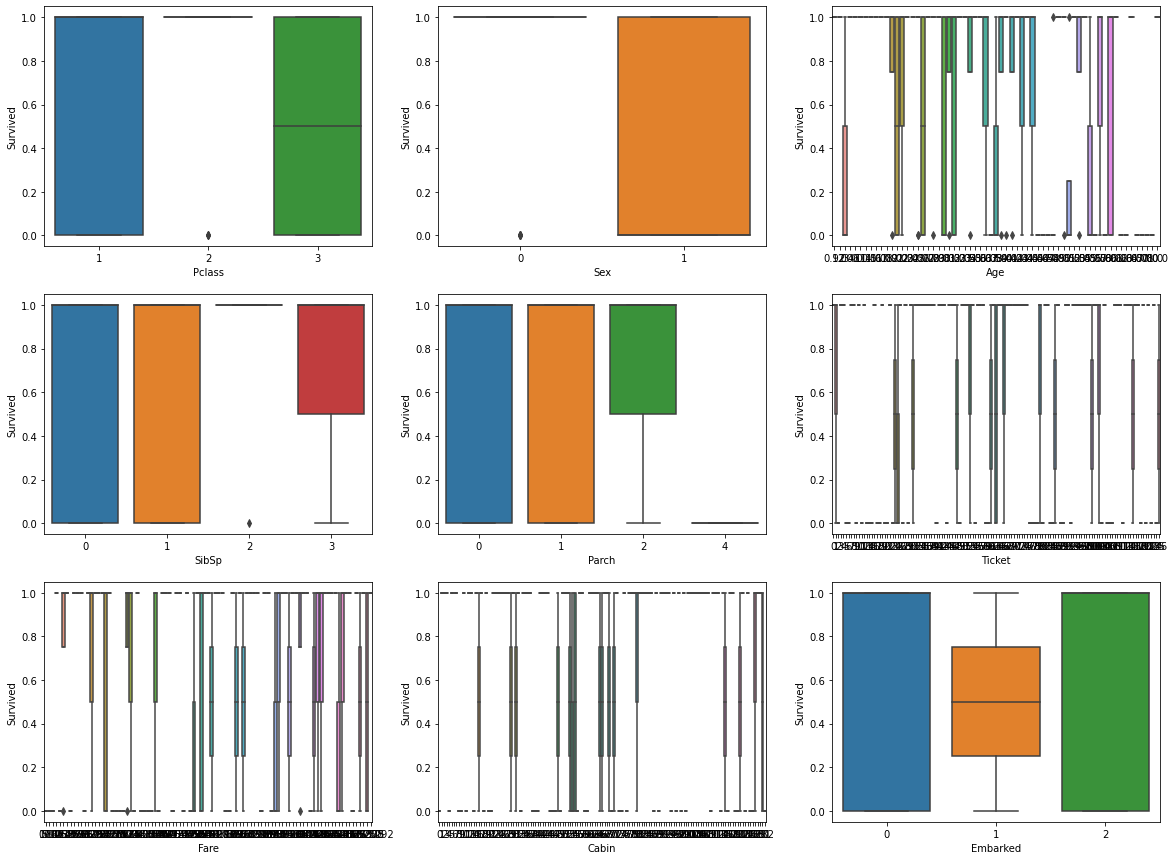

In [20]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Pclass', y = 'Survived', data = train_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'Sex', y = 'Survived', data = train_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'Age', y = 'Survived', data = train_data)

plt.subplot(3,3,4)
sns.boxplot(x = 'SibSp', y = 'Survived', data = train_data)

plt.subplot(3,3,5)
sns.boxplot(x = 'Parch', y = 'Survived', data = train_data)

plt.subplot(3,3,6)
sns.boxplot(x = 'Ticket', y = 'Survived', data = train_data)

plt.subplot(3,3,7)
sns.boxplot(x = 'Fare', y = 'Survived', data = train_data)

plt.subplot(3,3,8)
sns.boxplot(x = 'Cabin', y = 'Survived', data = train_data)

plt.subplot(3,3,9)
sns.boxplot(x = 'Embarked', y = 'Survived', data = train_data)


plt.show()

**Average Survived**

<Figure size 1440x432 with 0 Axes>

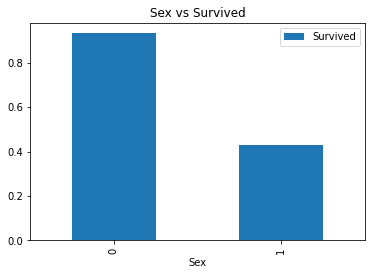

In [21]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(train_data.groupby(['Sex'])['Survived'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Sex vs Survived')
plt.show()

male seems to have the highest average surviving

**Correlations**

In [22]:
correlation = train_data.corr()
round(correlation,2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.00,0.15,-0.09,-0.03,-0.03,0.03,-0.08,-0.05,-0.02,0.03,-0.09,0.04
Survived,0.15,1.00,-0.03,-0.15,-0.53,-0.25,0.11,0.02,0.02,0.13,-0.01,-0.10
Pclass,-0.09,-0.03,1.00,0.18,-0.05,-0.31,-0.10,0.05,0.26,-0.32,0.48,0.24
Name,-0.03,-0.15,0.18,1.00,0.01,0.05,-0.15,0.01,0.03,-0.10,0.16,-0.03
Sex,-0.03,-0.53,-0.05,0.01,1.00,0.18,-0.10,-0.09,-0.07,-0.13,-0.04,0.06
Age,0.03,-0.25,-0.31,0.05,0.18,1.00,-0.16,-0.27,-0.02,-0.09,-0.14,-0.09
SibSp,-0.08,0.11,-0.10,-0.15,-0.10,-0.16,1.00,0.26,-0.03,0.29,0.04,0.04
Parch,-0.05,0.02,0.05,0.01,-0.09,-0.27,0.26,1.00,-0.04,0.39,-0.03,0.08
Ticket,-0.02,0.02,0.26,0.03,-0.07,-0.02,-0.03,-0.04,1.00,0.18,0.11,-0.25
Fare,0.03,0.13,-0.32,-0.10,-0.13,-0.09,0.29,0.39,0.18,1.00,-0.29,-0.24


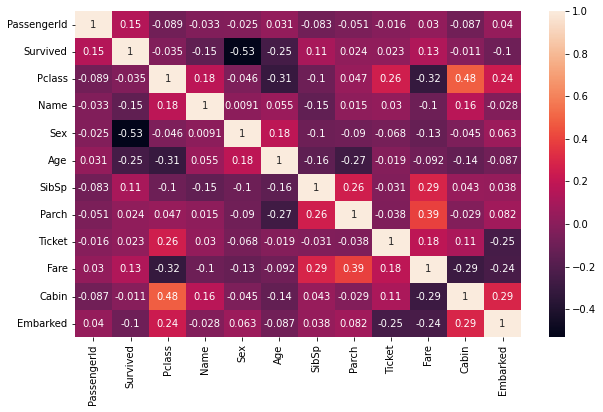

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [24]:
X = train_data[['Age', 'Fare', 'SibSp', 'Parch', 'Sex', 'Pclass', 'Embarked']]
y=train_data[['Survived']]

In [25]:
X=np.array(X)
y=np.array(y)

**Scaling**

In [26]:
maximum_value=X.max()
X= X / maximum_value

In [27]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train=X_train.T
X_valid=X_valid.T

In [29]:
y_train=y_train.reshape(1,-1)
y_valid=y_valid.reshape(1,-1)

In [30]:
print( 'X_train shape is ',X_train.shape)
print( 'X_valid shape is ',X_valid.shape)
print( 'y_train shape is ',y_train.shape)
print( 'y_valid shape is ',y_valid.shape)

X_train shape is  (7, 146)
X_valid shape is  (7, 37)
y_train shape is  (1, 146)
y_valid shape is  (1, 37)


# 1. Notations

**Hypothesis**

**$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$**

**Sigmoid function**

**$$g(z) = \frac{1}{1+e^{-z}}$$**

**Cost function**

**$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{}), y^{}) \right]$$**

**And loss is $$loss(f_{\mathbf{w},b}(\mathbf{x}^{}), y^{}) = (-y^{} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{} \right) \right) - \left( 1 - y^{}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{} \right) \right)$$**

**Gradient Descent**

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{}) - \mathbf{y}^{}) \tag{1}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{}) - \mathbf{y}^{})x^{} \tag{2}
$$


# Let`s begin

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
def model(X, y, epochs, alpha):
    
    m=X_train.shape[1]
    n=X_train.shape[0]
    
    W=np.zeros((n,1))
    b=0
    costs_list=[]
    
    for i in range(epochs):
        Z = np.dot(W.T,X) + b
        A = sigmoid(Z)
        
        #cost fucntion
        cost= -(1 / m) * np.sum(y * np.log(A) + (1 -y) * np.log(1-A))
        
        #Gradient Descent
        dW= (1 / m) * np.dot(A - y , X.T)
        db= (1 / m) * np.sum( A - y)
        
        # Update parameters
        W= W- alpha * dW.T
        b= b- alpha * db
        
        costs_list.append(cost)
        if(i%(epochs/10)==0):
            print('Cost after',i,'epochs is ', cost)
    return W,b,costs_list

In [33]:
W, b, costs_list=model(X_train,y_train,500000, 0.1)

Cost after 0 epochs is  0.6931471805599453
Cost after 50000 epochs is  0.5976306442529521
Cost after 100000 epochs is  0.5951961901355184
Cost after 150000 epochs is  0.5945089364615032
Cost after 200000 epochs is  0.5941100499393648
Cost after 250000 epochs is  0.5937611639246305
Cost after 300000 epochs is  0.5934218340852301
Cost after 350000 epochs is  0.5930850775210676
Cost after 400000 epochs is  0.5927496764874811
Cost after 450000 epochs is  0.5924154145198135


# Accuracy

In [34]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [35]:
my_acc=accuracy(X_valid, y_valid, W, b)

Accuracy of the model is :  64.86 %


# Compare our model to sklearn logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train.T,y_train.T)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [37]:
from sklearn.metrics import  accuracy_score 
predictions=lr.predict(X_train.T)
round(accuracy_score(y_train.T, predictions)*100,2)

68.49

**Our model got 64.86% accuracy. And logistic regression from sklearn got 68.94% accuracy**